In [55]:
from __future__ import print_function
from torch import Tensor


In [57]:
x=Tensor(5)
x.size()
x.fill_(1.124)


 1.1240
 1.1240
 1.1240
 1.1240
 1.1240
[torch.FloatTensor of size 5]

In [101]:
x.sum()
x.mean()
x.std()

0.0

In [103]:

a=Tensor(4,5).zero_()
a
a.narrow(1,2,2).fill_(1.0)
a


 0  0  1  1  0
 0  0  1  1  0
 0  0  1  1  0
 0  0  1  1  0
[torch.FloatTensor of size 4x5]

In [110]:
## Eigen decomposition ##
y=Tensor(3).normal_()
y


 0.0503
 0.4455
-0.7804
[torch.FloatTensor of size 3]

In [118]:
m=Tensor(3,3).normal_()

q,_=torch.gels(y,m)## solve MQ-Y
torch.mm(m,q)



 0.0503
 0.4455
-0.7804
[torch.FloatTensor of size 3x1]

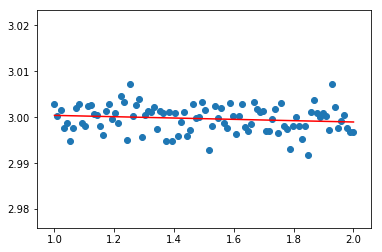

In [78]:
##linear regression##
import torch,numpy
from matplotlib import pyplot as plt
%matplotlib inline
nb_of_observations=100
X_coords=numpy.linspace(2,1,nb_of_observations)
Y_coords=numpy.random.normal(3,0.003,nb_of_observations)
plt.scatter(X_coords,Y_coords)
X,Y=torch.Tensor(len(X_coords),2),torch.Tensor(len(Y_coords))
X[:,0]=torch.from_numpy(X_coords[:])
X[:,1]=1
Y[:]=torch.from_numpy(Y_coords[:])
alpha,_=torch.gels(Y,X)
a,b=alpha[0,0],alpha[1,0]
plt.plot(X_coords,a*X_coords+b,'r')

In [236]:
from torch import Tensor

y=torch.ByteTensor(10)
u=y.new(3).fill_(343)
z=torch.eye(4)


In [302]:
X=torch.LongTensor([[1,2,9],[2,2,3]])
X
X.view(3,-1)


 1  2
 9  2
 2  3
[torch.LongTensor of size 3x2]

In [79]:

filepath='S:\\'

import  torch
import  torchvision
# Get the  CIFAR10  train  images , download  if  necessary
cifar = torchvision.datasets.CIFAR10(filepath , train=True , download=True)
# Converts  the  numpy  tensor  into a PyTorch  one
x = torch.from_numpy(cifar.train_data).transpose (1, 3).transpose (2, 3)
# Prints  out  some  info
print(str(type(x)), x.size(), x.min(), x.max())

Files already downloaded and verified
<class 'torch.ByteTensor'> torch.Size([50000, 3, 32, 32]) 0 255


In [80]:
x=x.narrow(0,0,48).float().div(255)
torchvision.utils.save_image(x,'images-cifar-4x12.png',nrow=12)


In [108]:
torchvision.utils.save_image(x,'images-cifar-4x12.png',nrow=12)


AttributeError: 'torch.FloatTensor' object has no attribute 'normal'

In [122]:
p=torch.Tensor(3,4).normal_()
print(p)



-1.0289  0.7040 -0.5979  1.5806
-0.0314  0.1857  0.5200  1.9723
-3.5661 -0.5836  0.4526 -0.3741
[torch.FloatTensor of size 3x4]



In [165]:
help(p.narrow)

Help on built-in function narrow:

narrow(...) method of torch.FloatTensor instance
    narrow(dimension, start, length) -> Tensor
    
    Returns a new tensor that is a narrowed version of this tensor. The dimension
    :attr:`dim` is narrowed from :attr:`start` to :attr:`start + length`. The
    returned tensor and this tensor share the same underlying storage.
    
    Args:
        dimension (int): The dimension along which to narrow
        start (int): The starting dimension
        length (int):
    
    Example:
        >>> x = torch.Tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
        >>> x.narrow(0, 0, 2)
         1  2  3
         4  5  6
        [torch.FloatTensor of size 2x3]
        >>> x.narrow(1, 1, 2)
         2  3
         5  6
         8  9
        [torch.FloatTensor of size 3x2]



In [3]:
import torch
from torch import Tensor
a=torch.FloatTensor([[1],[2],[3],[4]])
b=torch.FloatTensor([1,2,3,4])
c=a+b
c


 2  3  4  5
 3  4  5  6
 4  5  6  7
 5  6  7  8
[torch.FloatTensor of size 4x4]

In [6]:
## one perceptron##

def train_perceptron(x,y,nb_epochs_max):
    w=Tensor(x.size(1)).zero_()
    
    for e in range(nb_epochs_max):
        nb_changes=0
        for i in range(x.size(0)):
            if x[i].dot(w)*y[i]<=0:
                w=w+y[i]*x[i]
                nb_changes+=1
        if nb_changes==0:break
    return w
        
        



In [86]:
X=Tensor(32,2).normal_()
Y=[1  if i[0]<=i[1] else -1 for  i in X]
weights=train_perceptron(X,Y,1000)


x_test=Tensor([12, 32])
weights.dot(x_test)

52.61581802368164

In [107]:
q=torch.arange(20).storage()
q
x = torch.Tensor ().set_(q, storage_offset = 5, size = (4, 2), stride = (2, 1))
x


  5   6
  7   8
  9  10
 11  12
[torch.FloatTensor of size 4x2]

In [31]:
def multiply(func):
    def wrapper(*args,**kwargs):
        return 2*func(*args,**kwargs)
    return wrapper


@multiply
def add(a):
    return a+1

def add2(a):
    return a+2


add()


TypeError: add() missing 1 required positional argument: 'a'